In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://drive.usercontent.google.com/download?id=1KjTj1xm230mTHo3OSU_jU8rkHb9CT0-e&export=download&authuser=0&confirm=t&uuid=05a95e18-1964-46be-abae-24413b432217&at=APZUnTUSPfM1ndnrzXr6GHgZho0B:1714197726199')

# 1. Giới thiệu
1. Béo phì là một căn bệnh ảnh hưởng đến sức khỏe sức khỏe của con người, không phân biệt giới tính, độ tuổi. Béo phì còn được coi là yếu tố nguy cơ phát triển các bệnh tim mạch, đái tháo đường, rối loạn lipid máu, cùng nhiều bệnh khác, thông qua các rối loạn chuyển hóa như kháng insulin.
2. Mục tiêu của nghiên cứu là đánh giá tác động của các yếu tố liên quan lên mức độ béo phì và xây dựng một mô hình dự đoán một cách chính xác.Từ đó cung cấp nhiều thông tin hữu ích cho cộng đồng và nâng cao nhận thức mỗi người về nguy cơ béo phì.

# 2. Mô tả dữ liệu
Dữ liệu bao gồm 17 thuộc tính khác nhau và 2111 bản ghi.
Các thuộc tính có thể chia thành các nhóm như sau:
    - Các thuộc tính liên quan tới nhân khẩu: 'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight'.\
    - Các thuộc tính liên quan đến ăn uống: 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'CALC'.\
    - Các thuộc tính liên quan đến tình trạng thể chất:  'SMOKE', 'SCC', 'FAF', 'TUE', 'MTRANS'.\

# 3. Thống kê và so sánh chung

## 3.1 Thống kê tỷ lệ các kết luận

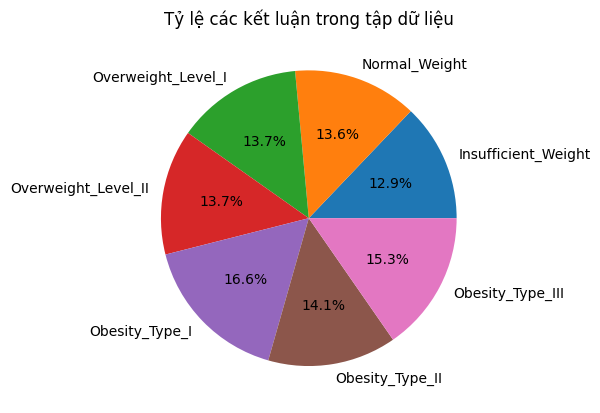

In [2]:
result = data['NObeyesdad']
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
         'Obesity_Type_II', 'Obesity_Type_III']
total = len(result)
percentages = []

for category in order:
    count = result.value_counts().get(category, 0)
    percentage = count/ total * 100
    percentages.append(percentage)

plt.pie(percentages, labels=order, autopct="%1.1f%%")
plt.title("Tỷ lệ các kết luận trong tập dữ liệu")
plt.show()

## 3.2 Thống kê về số dòng đủ giá trị trong mỗi thuộc tính

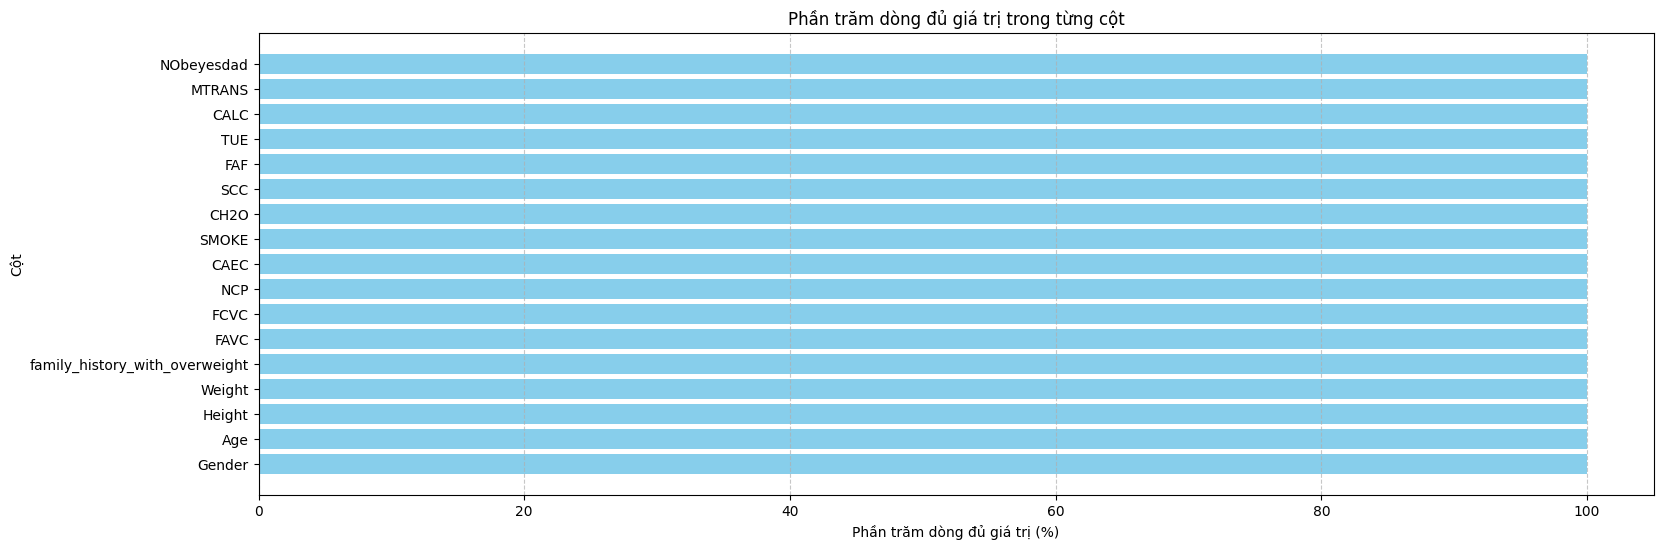

In [3]:

# Tính phần trăm dòng đủ giá trị trong từng cột
complete_rows_percentage = (data.count() / data.shape[0]) * 100
complete_rows_percentage = complete_rows_percentage.round()

# Chuyển đổi về DataFrame của Pandas
complete_rows_percentage_df = pd.DataFrame(complete_rows_percentage, columns=['Percentage'])

# Thêm cột 'Column' chứa tên các cột
complete_rows_percentage_df['Column'] = complete_rows_percentage_df.index

# Tạo biểu đồ cột
plt.figure(figsize=(18, 6))
plt.barh(complete_rows_percentage_df['Column'], complete_rows_percentage_df['Percentage'], color='skyblue')
plt.title('Phần trăm dòng đủ giá trị trong từng cột')
plt.xlabel('Phần trăm dòng đủ giá trị (%)')
plt.ylabel('Cột')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Điều này giúp nghiên cứu giảm thiểu việc phải xử lý những giá trị bị thiếu.


## 3.3 Các thuộc tính liên quan đến nhân khẩu

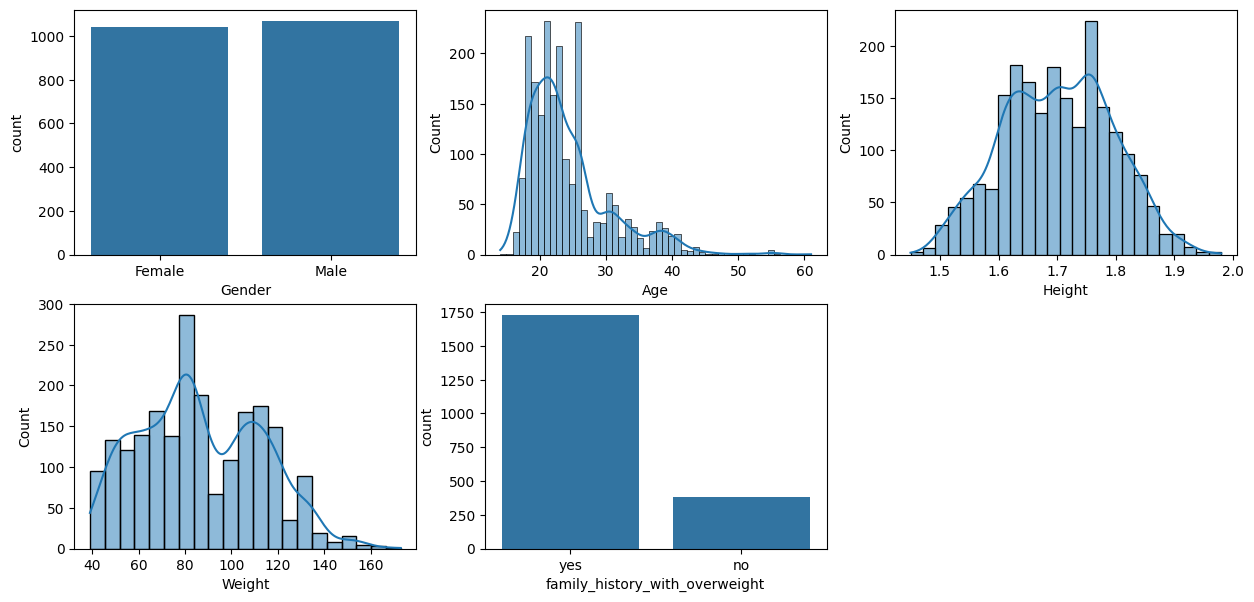

In [4]:
# Vẽ biểu đồ phân phối của từng thuộc tính
plt.figure(figsize=(15, 7))
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=data)
plt.subplot(2, 3, 2)
sns.histplot(data['Age'], kde=True)
plt.subplot(2, 3, 3)
sns.histplot(data['Height'], kde=True)
plt.subplot(2, 3, 4)
sns.histplot(data['Weight'], kde=True)
plt.subplot(2, 3, 5)
sns.countplot(x='family_history_with_overweight', data=data)
plt.show()

- Giới tính: Có sự cân bằng tuyệt đối giữa nam và nữ trong tập dữ liệu.
- Độ tuổi: Dữ liệu khảo sát từ 14 đến 61 tuổi, tập trung chủ yếu trong nhóm từ 18 đến 28 tuổi, một khoảng tuổi quan trọng trong quá trình phát triển.
- Chiều cao và cân nặng: Phân bố nhiều ở giữa với xu hướng dần giảm ở hai phía của biểu đồ, tương tự như phân phối chuẩn. Chiều cao từ 1m45 đến 1m98, cân nặng từ 39kg đến 173kg, đều phản ánh thực tế về một loạt các dữ liệu.
- Tiền sử gia đình về béo phì: Biểu đồ cho thấy sự chênh lệch lớn giữa kết quả "yes" (có tiền sử) và "no" (không có tiền sử), có thể lên đến gấp tới 5 lần.


## 3.4 Các thuộc tính liên quan đến ăn uống

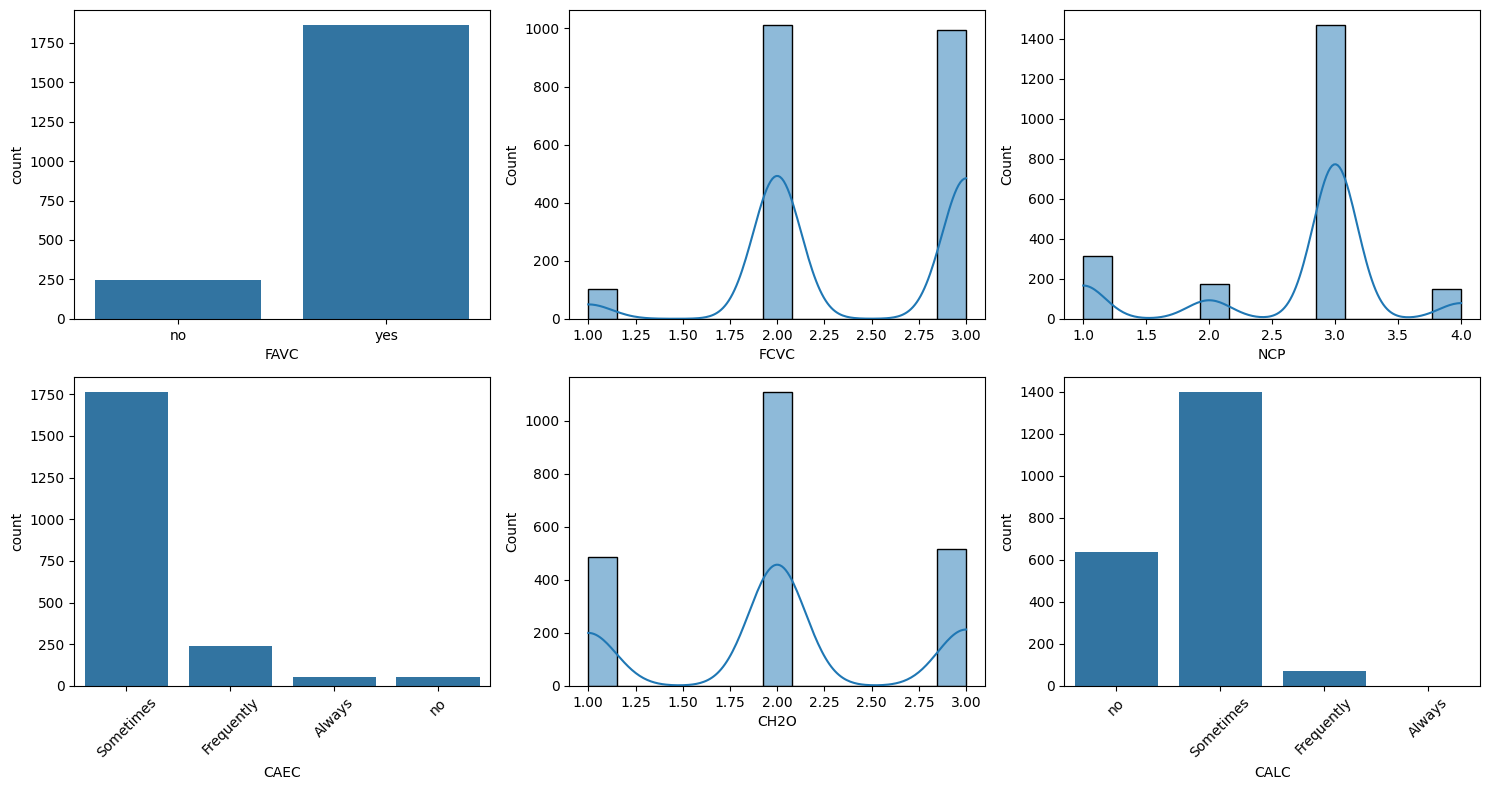

In [5]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.countplot(x='FAVC', data=data)
plt.subplot(2, 3, 2)
sns.histplot(data['FCVC'].round(), kde=True)
plt.subplot(2, 3, 3)
sns.histplot(data['NCP'].round(), kde=True)
plt.subplot(2, 3, 4)
sns.countplot(x='CAEC', data=data)
plt.xticks(rotation=45)
plt.subplot(2, 3, 5)
sns.histplot(data['CH2O'].round(), kde=True)
plt.subplot(2, 3, 6)
sns.countplot(x='CALC', data=data)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- FAVC (Thức ăn nhiều calo): Số người tiêu thụ thức ăn nhiều calo nhiều hơn đáng kể so với số người tiêu thụ ít calo.
- FCVC (Tiêu thụ rau): Có sự phân bố tăng dần từ ít tiêu thụ, thường xuyên, và cuối cùng luôn luôn tiêu thụ rau.
- NCP (Số bữa ăn chính trong ngày): Phần lớn người tham gia khảo sát có 3 bữa ăn chính trong một ngày, trong khi các giá trị khác xuất hiện ở mức độ thấp hơn.
- CAEC (Mức tiêu thụ thực phẩm giữa các bữa ăn): Đa số người được khảo sát cho biết tiêu thụ thực phẩm giữa các bữa ăn thỉnh thoảng, với một số nhỏ tiêu thụ thường xuyên và không.
- CH2O (Số lít nước tiêu thụ): Phần lớn người tiêu thụ khoảng 2 lít nước mỗi ngày, nhưng cũng có một số lượng đáng kể tiêu thụ 1 hoặc 3 lít.
- CALC(Tiêu thụ đồ uống có cồ): Số người thỉnh thoảng tiêu thụ đồ uống có cồn chiếm phần lớn, sau đó là những người không tiêu thụ, và một phần nhỏ tiêu thụ thường xuyên hoặc luôn luôn.

## 3.5 Các thuộc tính liên quan đến tình trạng thể chất

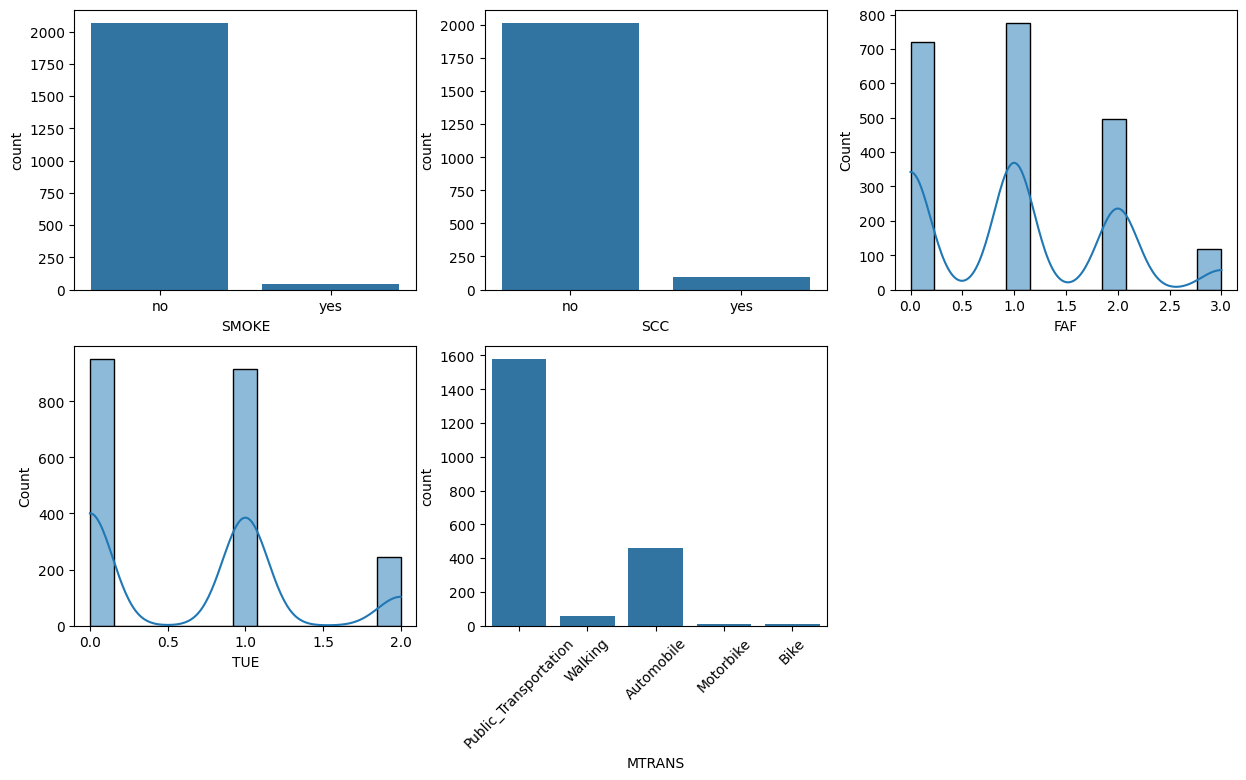

In [6]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.countplot(x='SMOKE', data=data)
plt.subplot(2, 3, 2)
sns.countplot(x='SCC', data=data)
plt.subplot(2, 3, 3)
sns.histplot(data['FAF'].round(), kde=True)
plt.subplot(2, 3, 4)
sns.histplot(data['TUE'].round(), kde=True)
plt.subplot(2, 3, 5)
sns.countplot(x='MTRANS', data=data)
plt.xticks(rotation=45)
plt.show()

- Hút thuốc (SMOKE): Số người không hút thuốc chiếm phần lớn trong tập dữ liệu, trong khi số lượng người hút thuốc rất ít.
- Theo dõi lượng calo tiêu thụ (SCC): Phần lớn người không theo dõi lượng calo tiêu thụ, với số lượng ít người theo dõi.
- Phương tiện di chuyển (MTRANS): Phương tiện công cộng là phương tiện di chuyển được ghi nhận nhiều nhất, tiếp theo là xe ô tô. Các phương tiện như xe máy, xe đạp, và đi bộ chiếm một phần nhỏ trong tập dữ liệu.
- Hoạt động thể chất và thời gian sử dụng thiết bị công nghệ: Sự phân bố chủ yếu là ở nhóm người ít vận động và ít sử dụng thiết bị công nghệ. Dần dần, phân bố chuyển sang nhóm người vận động nhiều và sử dụng thiết bị công nghệ nhiều hơn.

# 4. So sánh chuyên sâu


## 4.1 Các thuộc tính liên quan đến nhân khẩu

In [7]:
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
         'Obesity_Type_II', 'Obesity_Type_III']
gender_by_group = data.groupby(['NObeyesdad', 'Gender']).size().unstack(fill_value=0)
gender_by_group = gender_by_group.reindex(order)

### Gender (giới tính)

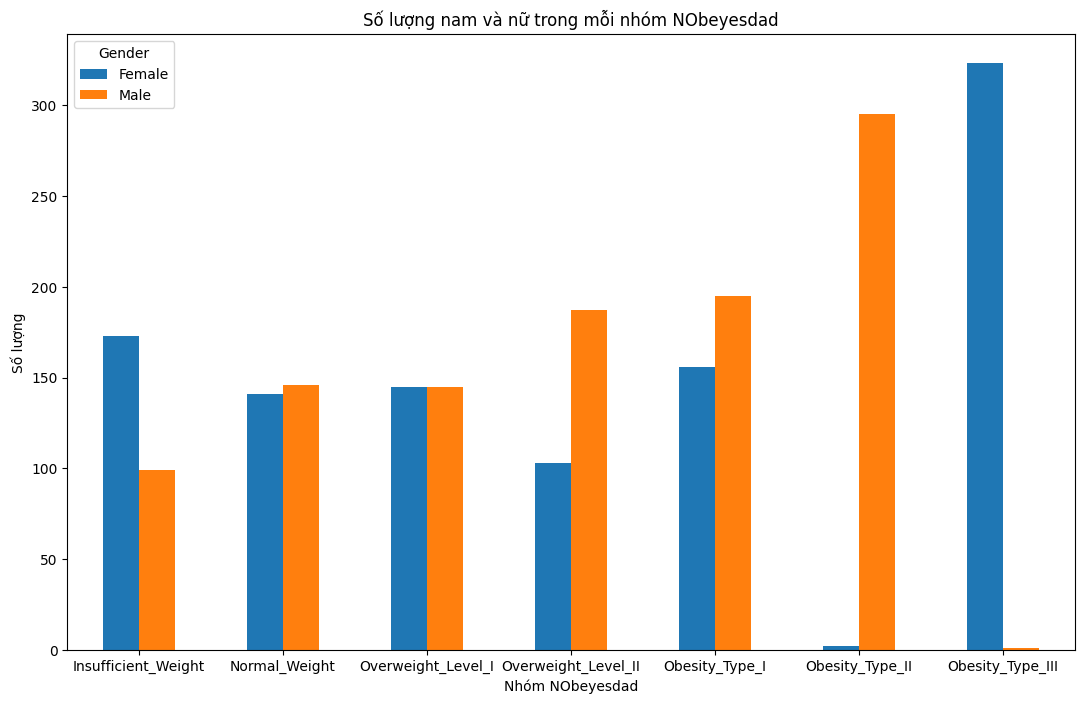

In [8]:
gender_by_group.plot(kind='bar', figsize=(13, 8))

# Định dạng biểu đồ
plt.title('Số lượng nam và nữ trong mỗi nhóm NObeyesdad')
plt.xlabel('Nhóm NObeyesdad')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Hiển thị biểu đồ
plt.show()

- Tỷ lệ nam nữ khá đều giữa các nhóm, cho thầy khả năng bị béo phì có thể xảy ra ở cả nam và nữ là như nhau.
- Ở nhóm béo phì cấp độ 2 và béo phì cấp độ 3 có sự chênh lệch những sự phân bố vẫn có ý nghĩa đối với kết quả phân loại béo phì

In [9]:
from scipy.stats import chi2_contingency
#kiểm tra sự khác biệt giữa các nhóm dựa trên tần số quan sát
# Tạo bảng tần số
contingency_table = pd.crosstab(data['NObeyesdad'], data['Gender'])
# Kiểm định chi-square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# In kết quả
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Bác bỏ giả thuyết: Không có mối quan hệ giữa giới tính và mức độ béo phì")
else:
    print("Công nhận giả thuyết: Không có mối quan hệ giữa giới tính và mức độ béo phì")


Chi-square statistic: 657.746227342968
p-value: 8.088897293329991e-139
Bác bỏ giả thuyết: Không có mối quan hệ giữa giới tính và mức độ béo phì


- Điều này làm cho kết quả trở nên ý nghĩa thống kê và có giá trị trong việc đưa ra kết luận về mối quan hệ giữa giới tính và trạng thái béo phì


### Age (Tuổi)

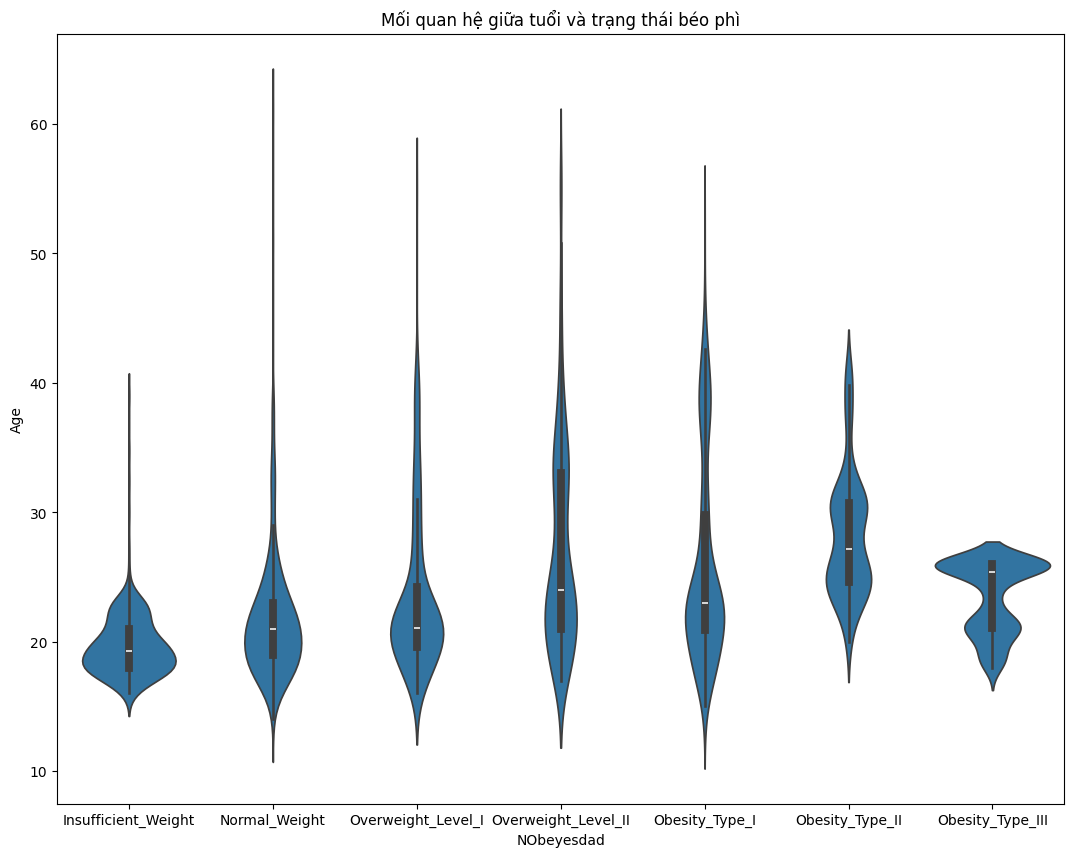

In [10]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(13, 10))
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
         'Obesity_Type_II', 'Obesity_Type_III']
# Vẽ biểu đồ Violin plot
sns.violinplot(x='NObeyesdad', y='Age', data=data,  order= order)

# Đặt tiêu đề cho biểu đồ
plt.title('Mối quan hệ giữa tuổi và trạng thái béo phì')
plt.xticks(rotation=0)  # Xoay nhãn trục x để dễ đọc hơn
# Hiển thị biểu đồ
plt.show()

- Tình trạng thiếu cân thường xảy ra ở độ tuổi dưới 20, còn các tình trạng béo phì xảy ra nhiều ở độ tuổi từ 20 trở lên.
- Chiều dài của từng cột biểu đồ thể hiện béo phì có thể xảy ra ở bất kỳ độ tuổi nào.


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Overweight_Level_I'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Obesity_Type_I'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

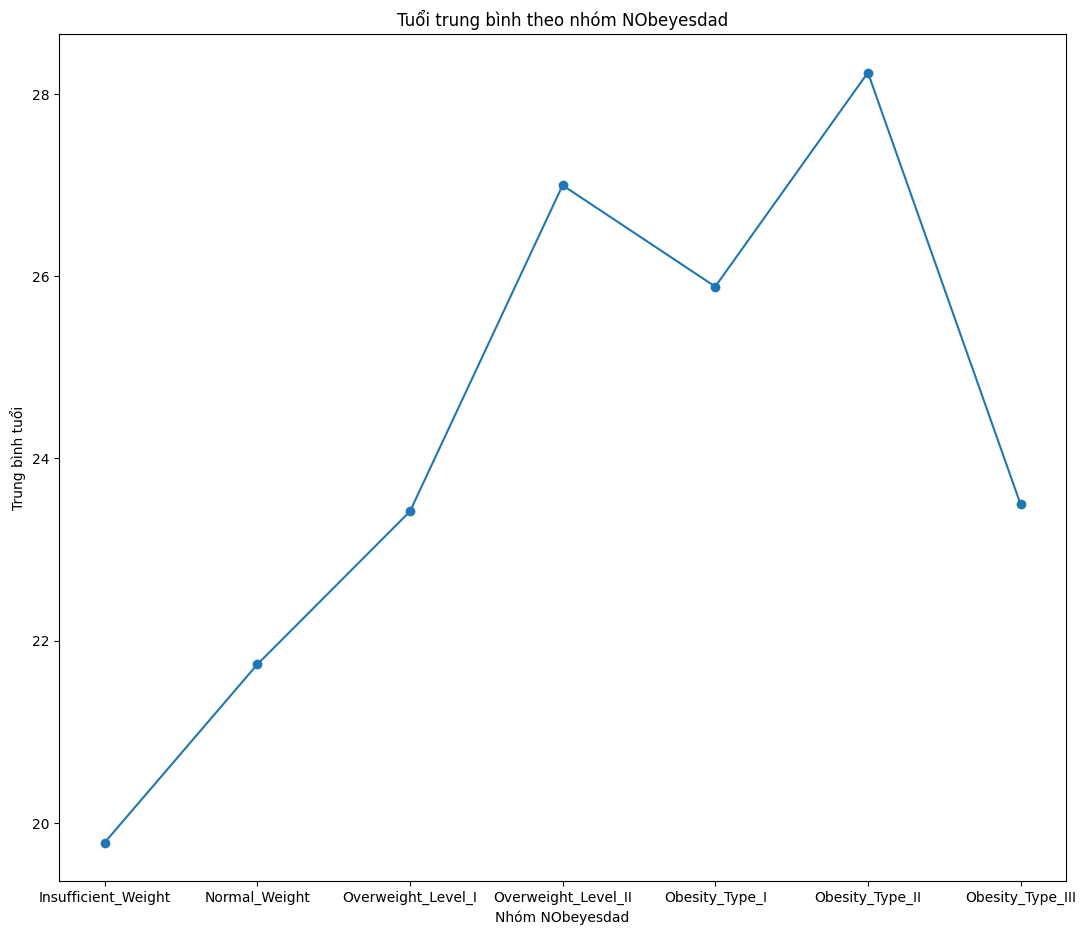

In [12]:
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
         'Obesity_Type_II', 'Obesity_Type_III']
average_age_by_group = data.groupby('NObeyesdad')['Age'].mean()
average_age_by_group = average_age_by_group.reindex(order)

# Vẽ biểu đồ đường
plt.figure(figsize=(13, 11))
plt.plot(average_age_by_group.index, average_age_by_group.values, marker='o', linestyle='-')
plt.title('Tuổi trung bình theo nhóm NObeyesdad')
plt.xlabel('Nhóm NObeyesdad')
plt.ylabel('Trung bình tuổi')
plt.xticks(rotation=0)  # Xoay nhãn trục x để dễ đọc hơn

- Các nhóm người bị béo phì có độ tuổi trung bình lớn nhóm người bình thường và thiếu cân. Do một số lý do như: thay đổi về trao đổi chất, giảm hoạt động thể chất, các bệnh mãn tính,...


### Weight (cân nặng)

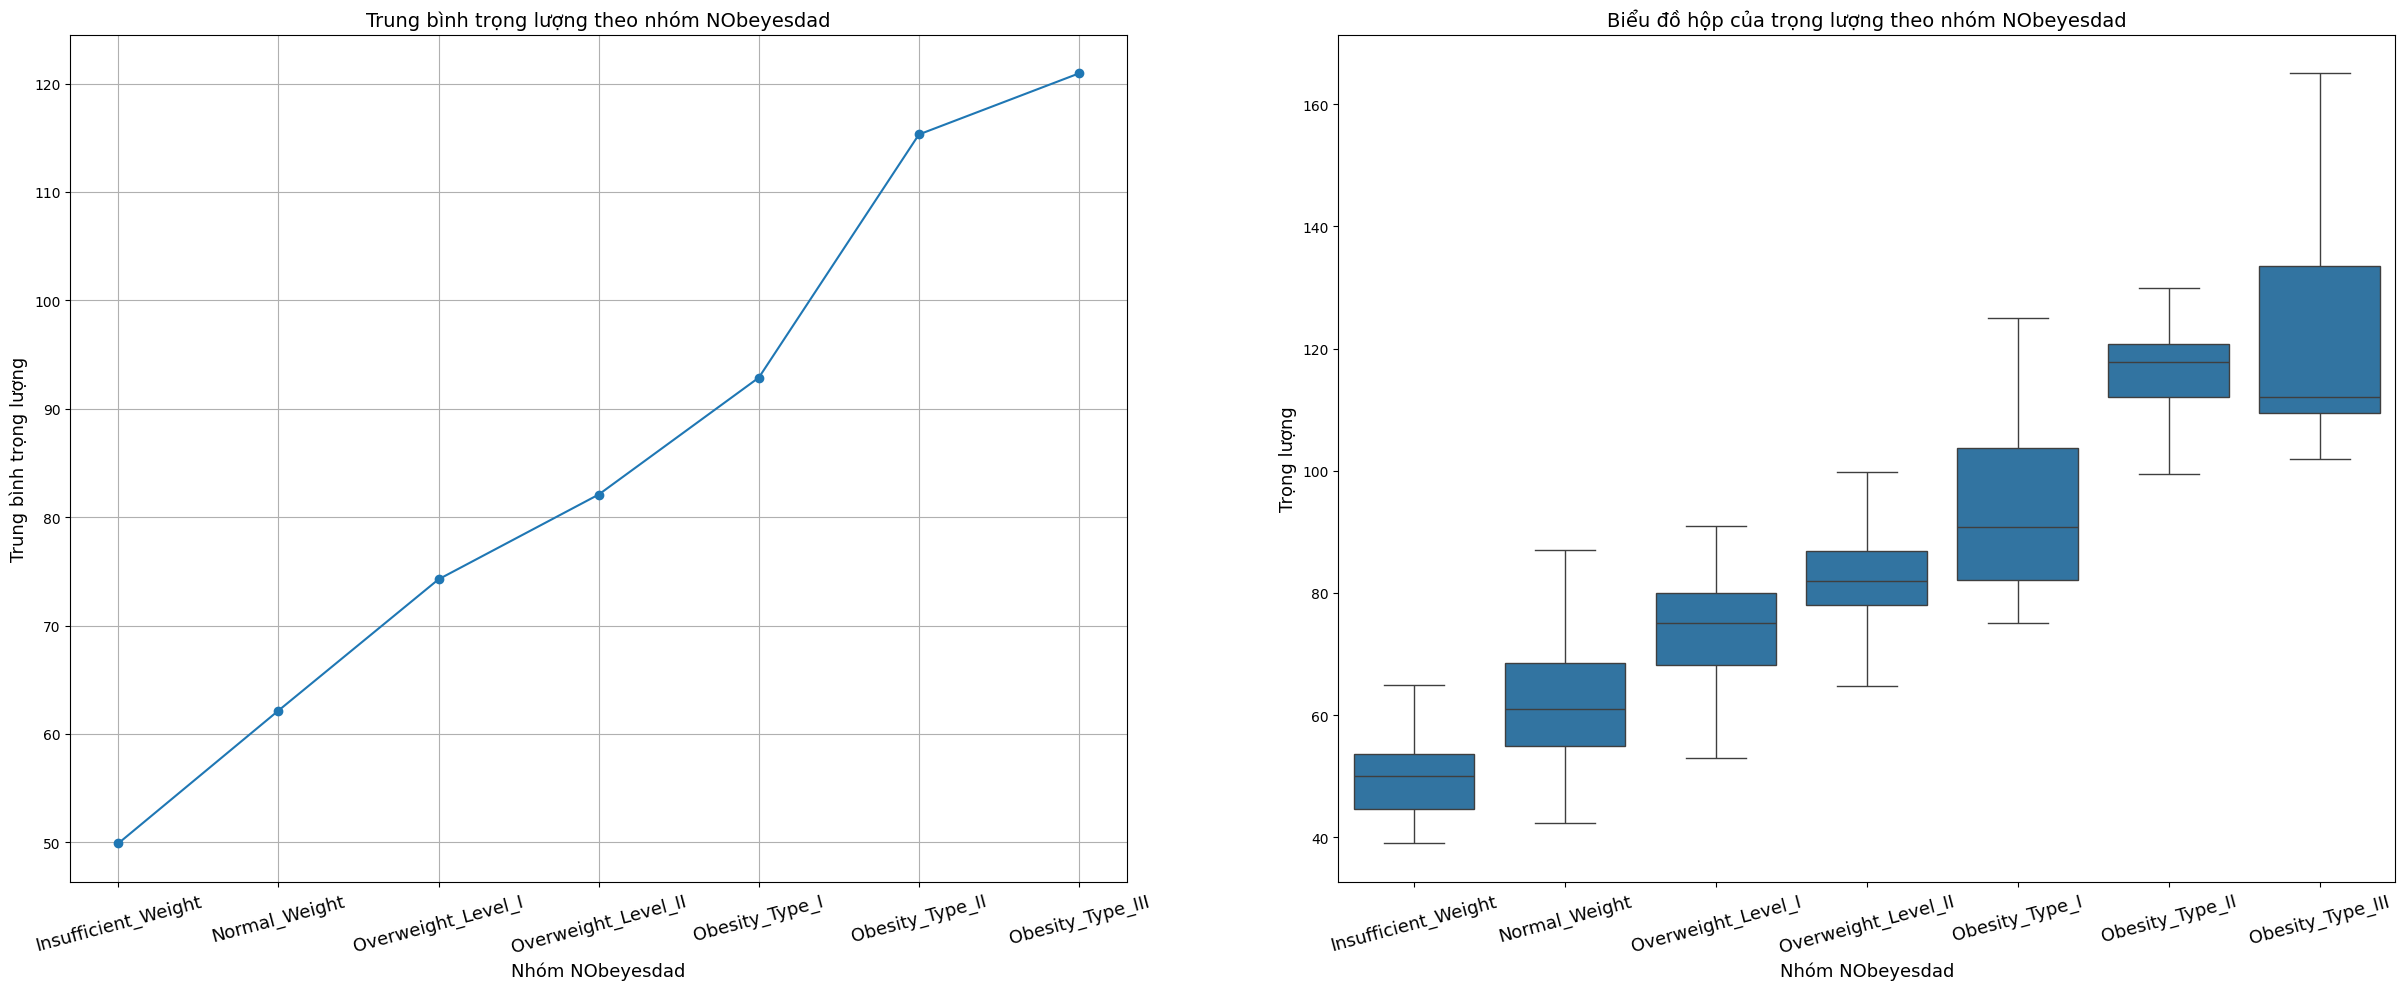

In [13]:
average_weight_by_group = data.groupby('NObeyesdad')['Weight'].mean()
average_weight_by_group = average_weight_by_group.sort_values()
groups = []
values = []
for key, value in average_weight_by_group.items():
    groups.append(key)
    values.append(value)
plt.figure(figsize=(30, 11))
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
         'Obesity_Type_II', 'Obesity_Type_III']
average_weight_by_group = average_weight_by_group.reindex(order)
# Vẽ biểu đồ đường
plt.subplot(1, 2, 1)
plt.plot(average_weight_by_group.index, average_weight_by_group.values, marker='o', linestyle='-')
plt.title('Trung bình trọng lượng theo nhóm NObeyesdad', fontsize = 14)
plt.xlabel('Nhóm NObeyesdad', fontsize = 13)
plt.ylabel('Trung bình trọng lượng', fontsize = 13)
plt.xticks(rotation=15, fontsize = 13)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(True)

plt.subplot(1, 2, 2)

# Vẽ biểu đồ Boxplot kết hợp với Swarmplot
sns.boxplot(x='NObeyesdad', y='Weight', data=data, showfliers=False, order= order)
plt.title('Biểu đồ hộp của trọng lượng theo nhóm NObeyesdad', fontsize = 14)
plt.xticks(rotation=15, fontsize = 13)  # Xoay nhãn trục x để dễ đọc hơn
plt.ylabel('Trọng lượng', fontsize = 13)
plt.xlabel('Nhóm NObeyesdad', fontsize = 13)
plt.show()

- Có sự khác biệt rõ ràng về cân nặng trung bình của các nhóm béo phì. Tình trạng béo phì càng nặng thì trọng lượng trung bình càng lớn
- Nhưng không thể chỉ dựa vào trọng lượng để quyết định một người thuộc nhóm béo phì nào vì sự phân bố không đông đều trọng lượng vào các nhóm béo phì.

In [14]:
from scipy.stats import f_oneway

# Tạo các nhóm dữ liệu dựa trên các giá trị trong thuộc tính "NObeyesdad"
groups = []
for group_name in data['NObeyesdad'].unique():
    groups.append(data[data['NObeyesdad'] == group_name]['Weight'])

# Sử dụng kiểm định ANOVA để kiểm tra sự khác biệt trung bình giữa các nhóm
f_statistic, p_value = f_oneway(*groups)

# In kết quả
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Sự khác biệt trung bình giữa các nhóm trọng lượng là ý nghĩa đối với kết quả.")
else:
    print("Sự khác biệt trung bình giữa các nhóm trọng lượng không có ý nghĩa đối với kết quả.")

F-statistic: 1966.5180176274862
p-value: 0.0
Sự khác biệt trung bình giữa các nhóm trọng lượng là ý nghĩa đối với kết quả.


### Height (chiều cao)

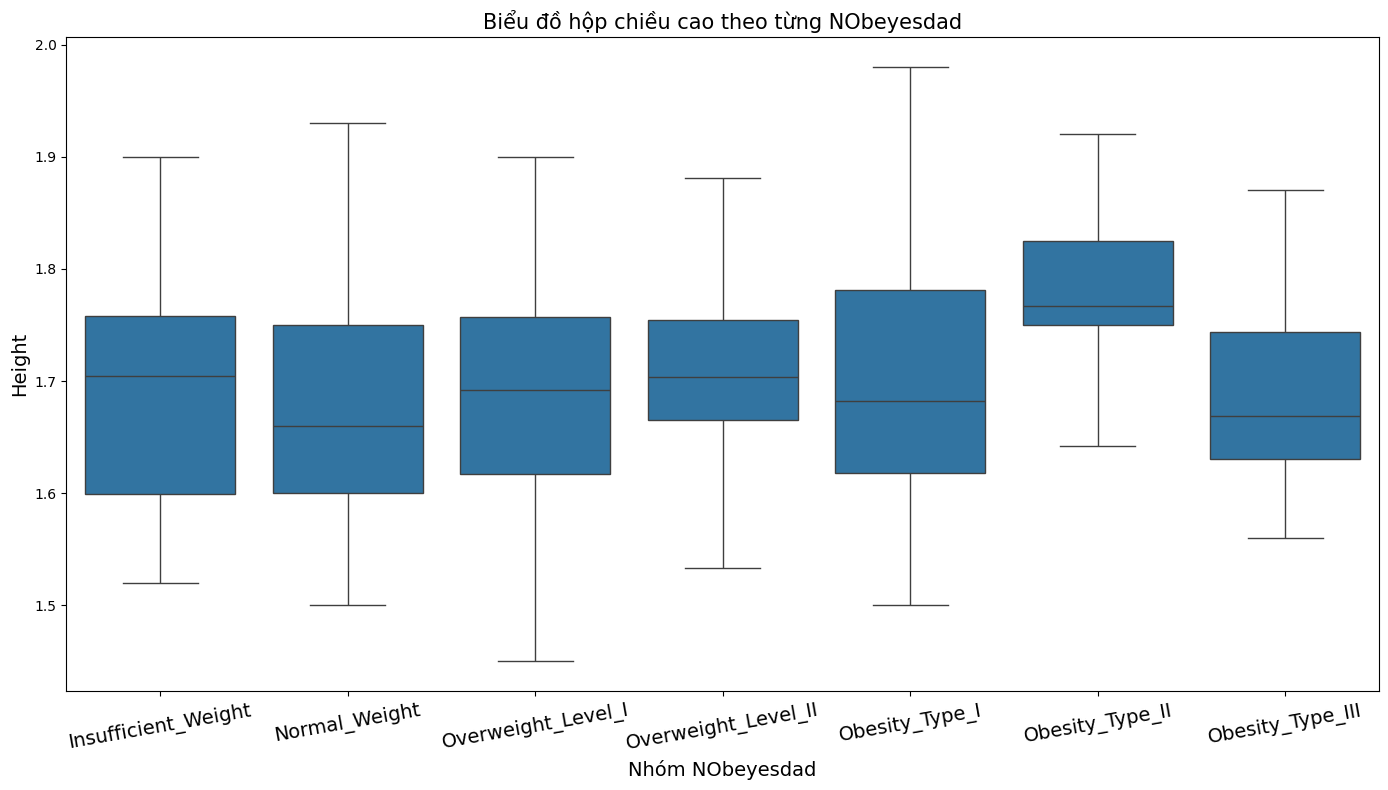

In [15]:
# Sắp xếp các giá trị trên trục x theo thứ tự
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
         'Obesity_Type_II', 'Obesity_Type_III']
data_ordered = data[data['NObeyesdad'].isin(order)]
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 8))

# Vẽ biểu đồ Boxplot kết hợp với Swarmplot
sns.boxplot(x='NObeyesdad', y='Height', data=data, showfliers=False, order=order)
plt.title('Biểu đồ hộp chiều cao theo từng NObeyesdad', fontsize =  15)
plt.xticks(rotation=10, fontsize = 14)  # Xoay nhãn trục x để dễ đọc hơn
plt.xlabel('Nhóm NObeyesdad', fontsize = 14)
plt.ylabel('Height', fontsize = 14)
plt.tight_layout()

- Chiều cao tập trung nhiều ở khoảng từ 1,6m đến 1,8m (chiều cao của một người trưởng thành) hoàn toàn phù hợp với thông kế về tuổi của những người được khảo sát.
- Góp phần nâng cao độ tin cậy của dữ liệu.

In [16]:
# Tạo các nhóm dữ liệu dựa trên các giá trị trong thuộc tính "NObeyesdad"
groups = []
for group_name in data['NObeyesdad'].unique():
    groups.append(data[data['NObeyesdad'] == group_name]['Height'])

# Sử dụng kiểm định ANOVA để kiểm tra sự khác biệt trung bình giữa các nhóm
f_statistic, p_value = f_oneway(*groups)

# In kết quả
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Sự khác biệt trung bình giữa các nhóm chiều cao là ý nghĩa đối với kết quả.")
else:
    print("Sự khác biệt trung bình giữa các nhóm trọng lượng không có ý nghĩa đối với kết quả.")


F-statistic: 38.43231255660025
p-value: 1.6858535844061656e-44
Sự khác biệt trung bình giữa các nhóm chiều cao là ý nghĩa đối với kết quả.


### family_history_with_overweight (Tiền sử bị béo phì trong gia đình)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Overweight_Level_I'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Obesity_Type_I'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

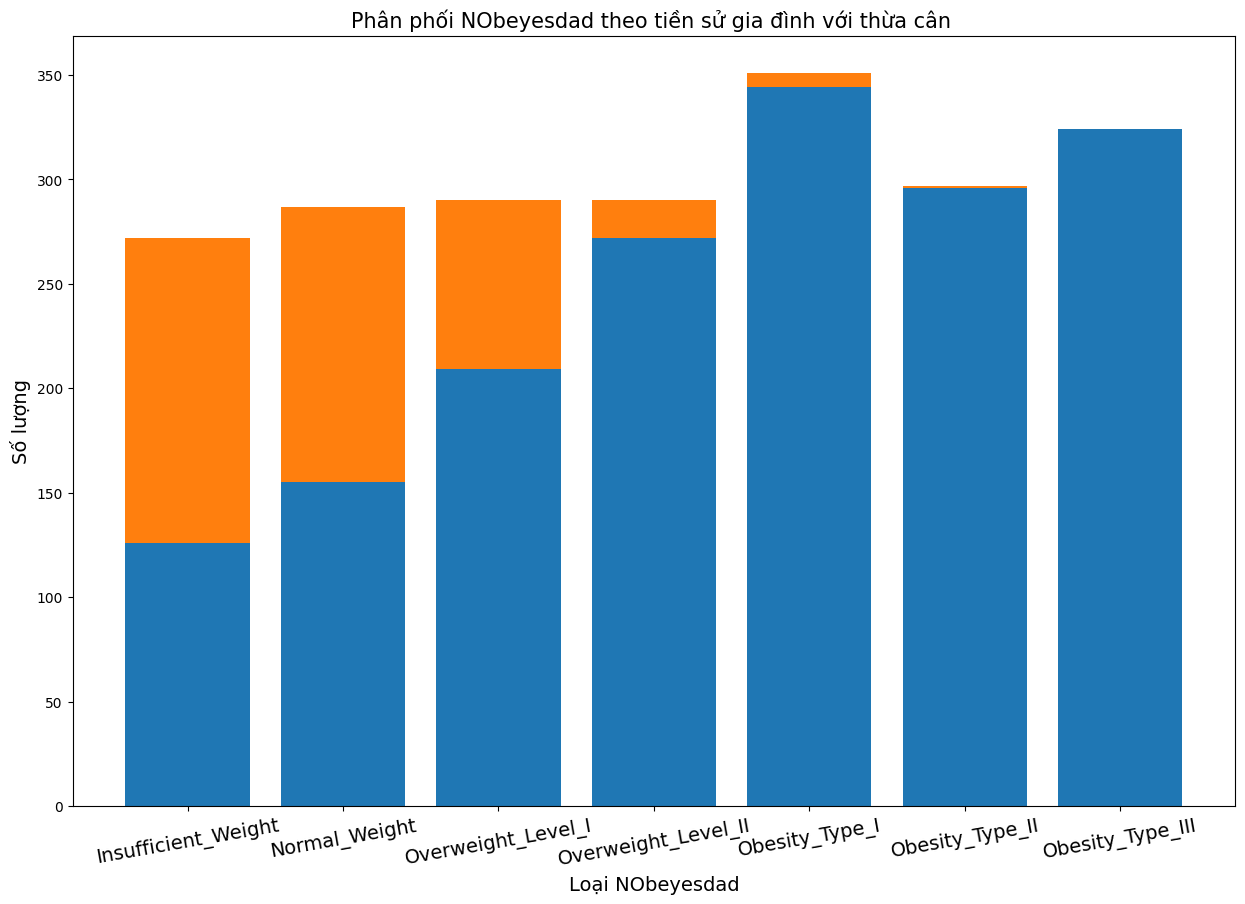

In [17]:
# Dữ liệu mẫu
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
         'Obesity_Type_II', 'Obesity_Type_III']
yes_values = [data[data['family_history_with_overweight'] == 'yes'].groupby('NObeyesdad').size().get(cat, 0) for cat in order]
no_values = [data[data['family_history_with_overweight'] == 'no'].groupby('NObeyesdad').size().get(cat, 0) for cat in order]
# Vẽ biểu đồ sếp chồng
plt.figure(figsize=(15, 10))
plt.bar(order, yes_values, label='Yes')
plt.bar(order, no_values, bottom=yes_values, label='No')
plt.xlabel('Loại NObeyesdad', fontsize = 14)
plt.ylabel('Số lượng', fontsize = 14)
plt.title('Phân phối NObeyesdad theo tiền sử gia đình với thừa cân ', fontsize = 15)
plt.xticks(rotation = 10, fontsize = 14)

- Biểu đồ cho thấy một dự kiện quan trọng là béo phì có liên quan mật thiết tới yếu tố di truyền

## 4.2 Các thuộc tính liên quan đến ăn uống

### FAVC - Tần suất tiêu thụ đồ ăn nhiều calo

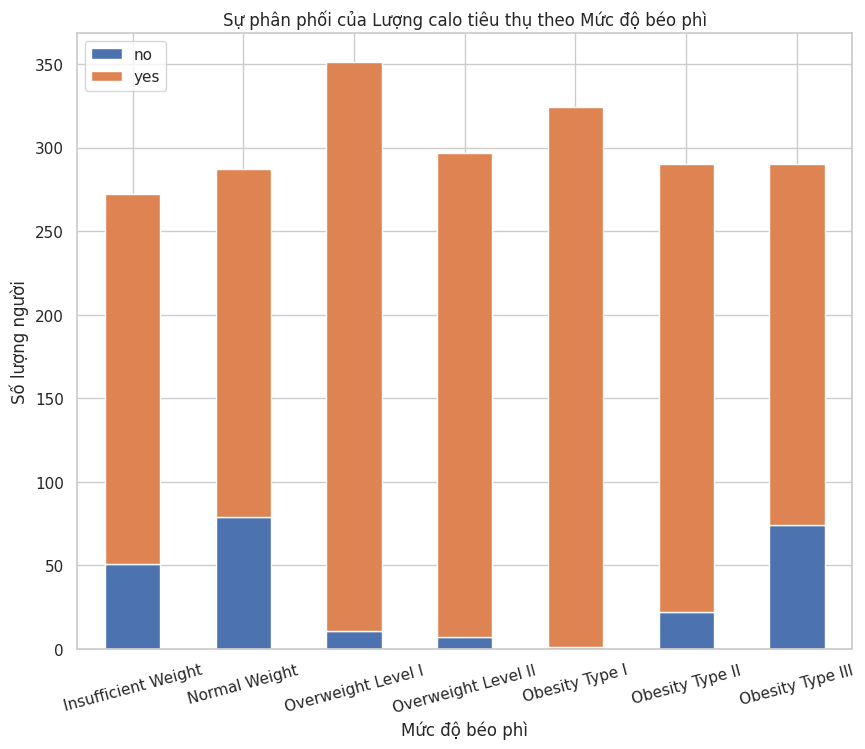

In [18]:
sns.set(style="whitegrid")
df_plot = data[['NObeyesdad', 'FAVC']]
grouped_data = df_plot.groupby(['NObeyesdad', 'FAVC']).size().unstack()

obesity_levels = [
    'Insufficient Weight',
    'Normal Weight',
    'Overweight Level I',
    'Overweight Level II',
    'Obesity Type I',
    'Obesity Type II',
    'Obesity Type III'
]


grouped_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Sự phân phối của Lượng calo tiêu thụ theo Mức độ béo phì')
plt.xlabel('Mức độ béo phì')
plt.ylabel('Số lượng người')
plt.xticks(ticks=range(len(obesity_levels)), labels=obesity_levels, rotation=15)
plt.legend(loc='upper left')
plt.show()

- Do số lượng thống kê vượt trội của giá trị yes so với no nên biểu đồ trên bị thống trị bởi giá trị yes
- Tuy nhiên, biểu đồ cũng phản ảnh đúng hiện thực là ít tiêu thụ các thực phẩm nhiều calo thì sẽ ít khả năng bị béo phì hơn.(Cột Insufficient Weight và Normal Weight có giá trị yes thấp hơn một chút và có giá trị no nhiều hơn so với các cột khác)
- Ở cột béo phì loại 2 và 3 có sự tăng nhẹ thống kê ở cột no, điều này có thể là do những người này đã nhận thức được về sức khỏe và thực hiện hạn chế đồ ăn có nhiều calo


### FCVC - Tần suất tiêu thụ rau

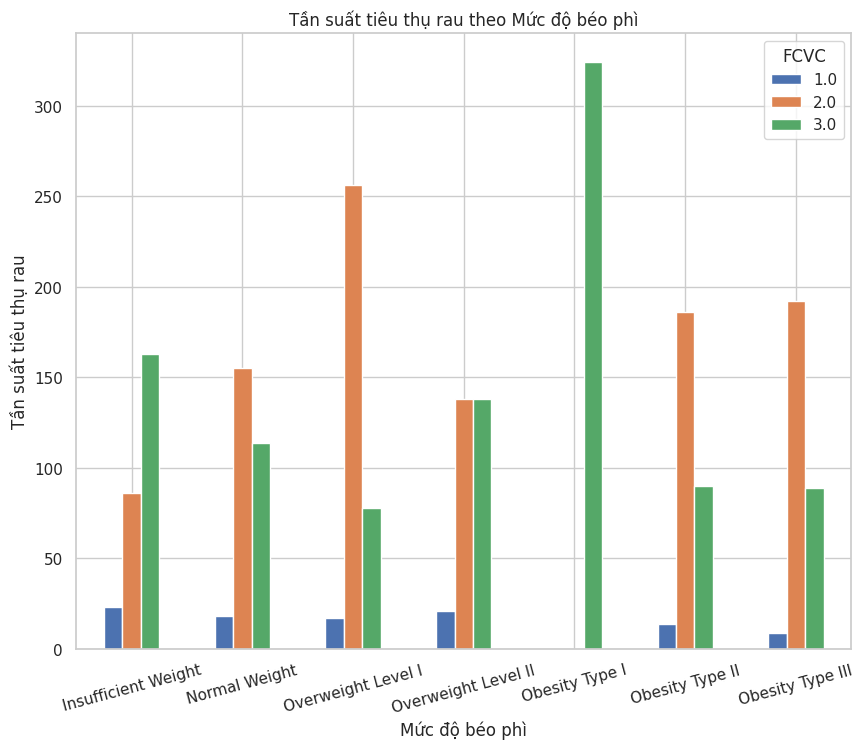

In [19]:
data['FCVC'] = data['FCVC'].round()
df_plot = data[['FCVC', 'NObeyesdad']]
grouped_data = df_plot.groupby(['NObeyesdad', 'FCVC']).size().unstack()
obesity_levels = [
    'Insufficient Weight',
    'Normal Weight',
    'Overweight Level I',
    'Overweight Level II',
    'Obesity Type I',
    'Obesity Type II',
    'Obesity Type III'
]

grouped_data.plot(kind='bar', stacked=False,figsize=(10, 8))
plt.title('Tần suất tiêu thụ rau theo Mức độ béo phì')
plt.xlabel('Mức độ béo phì')
plt.ylabel('Tần suất tiêu thụ rau')
plt.xticks(ticks=range(len(obesity_levels)), labels=obesity_levels, rotation=15)
plt.legend(title='FCVC', loc='upper right')
plt.show()


- Biểu đồ trên thể hiện sự phân bố giữa các nhóm tiêu thụ rau cho thấy rằng số lượng người không bao giờ ăn rau phân bố đều ở các nhóm béo phì
- Đa số những người ăn rau nhiều ở vào béo phì loại 1 và đồng thời cột này cũng không có giá trị khác.
- Điều này phản ảnh trái với thực tế rằng ăn nhiều rau sẽ giảm khả năng béo phì và việc dữ liệu phân bổ cũng có thể ảnh hưởng không tốt lên tập dữ liệu

### NCP - Số bữa ăn chính

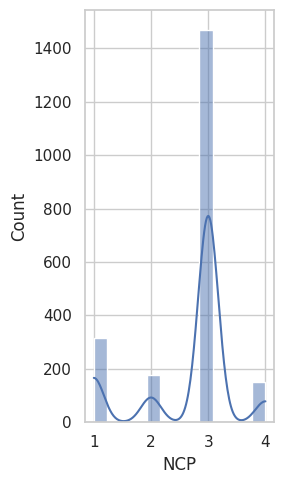

In [20]:
data['NCP'] = data['NCP'].round().astype(int)

plt.figure(figsize=(3, 5))
plt.subplot2grid((1, 1), (0, 0), colspan=2)
sns.histplot(data['NCP'], kde=True)

plt.tight_layout()
plt.show()

- Biểu đồ thể hiện rằng 3 bữa ăn chính hằng ngày chiếm nhiều nhất, trong khi các giá trị khác chỉ chiếm một phần rất nhỏ. Điều này có thể là do việc có 3 bữa ăn chính là tự nhiên tuân theo cơ chế tiêu hóa và hấp thụ dinh dưỡng của cơ thể con người.
- Trong thực tế, số bữa ăn chính có thể ảnh hưởng tới cân nặng và tính trạng béo phì, tuy nhiên cần phải xem xét đến các yếu tố dinh dưỡng khác của bữa ăn như lượng calo cũng như đạm và chất béo được hấp thụ có trong bữa ăn đó.

### CACE - Tần  suất tiêu thụ thực phẩm giữa các bữa ăn

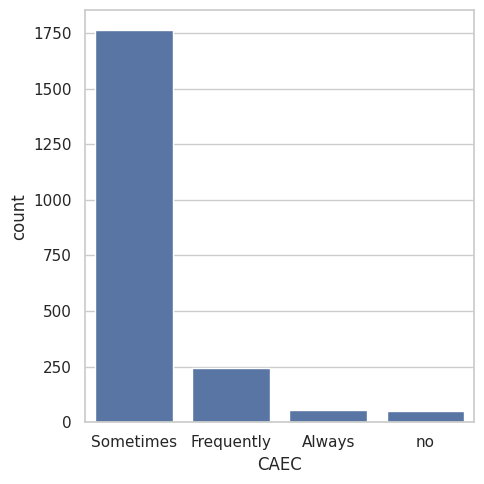

In [21]:
plt.figure(figsize=(5, 5))
plt.subplot2grid((1, 1), (0, 0), colspan=2)
sns.countplot(x='CAEC', data=data)
plt.tight_layout()
plt.show()

- Dựa trên số liệu thống kê, có thể nhận thấy rằng có sự phân bố không đồng đều giữa các nhóm 'Sometimes', 'Frequently', 'Always' và 'No'. Cụ thể, nhóm 'Sometimes' có số lượng thống kê cao nhất, tiếp theo là 'Frequently', sau đó là 'Always' và 'No' đều có số lượng thống kê thấp không đáng kể, chỉ nhỏ hơn 50
- Điều này có vẻ là đúng với thực tế vì nó phản ánh một mẫu sống phổ biến trong xã hội hiện đại, nhiều người có thể có thói quen ăn uống linh hoạt, không đặt ra một lịch trình ăn cố định. Họ có thể ăn giữa các bữa ăn chính chỉ khi cảm thấy đói hoặc có cơ hội bởi cuộc sống hiện nay khá là bận rộn và làm như thế thể tiết kiệm được kha khá thời gian.        


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

data.dropna(inplace=True)
label_encoder = LabelEncoder()
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

In [23]:
from scipy.stats import f_oneway

data['CAEC'] = data['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

group_no = data[data['CAEC'] == 0]['NObeyesdad']
group_sometimes = data[data['CAEC'] == 1]['NObeyesdad']
group_frequently = data[data['CAEC'] == 2]['NObeyesdad']
group_always = data[data['CAEC'] == 3]['NObeyesdad']

f_statistic, p_value = f_oneway(group_no, group_sometimes, group_frequently, group_always)

print("Giá trị F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Có bằng chứng để bác bỏ giả thuyết H0: Không có sự khác biệt đáng kể giữa ít nhất một cặp nhóm.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thuyết H0: Không có sự khác biệt đáng kể giữa các nhóm.")

Giá trị F-statistic: 114.29735393628926
p-value: 1.4205872553744423e-68
Có bằng chứng để bác bỏ giả thuyết H0: Không có sự khác biệt đáng kể giữa ít nhất một cặp nhóm.


### CH2O - Số lít nước tiêu thụ trong ngày

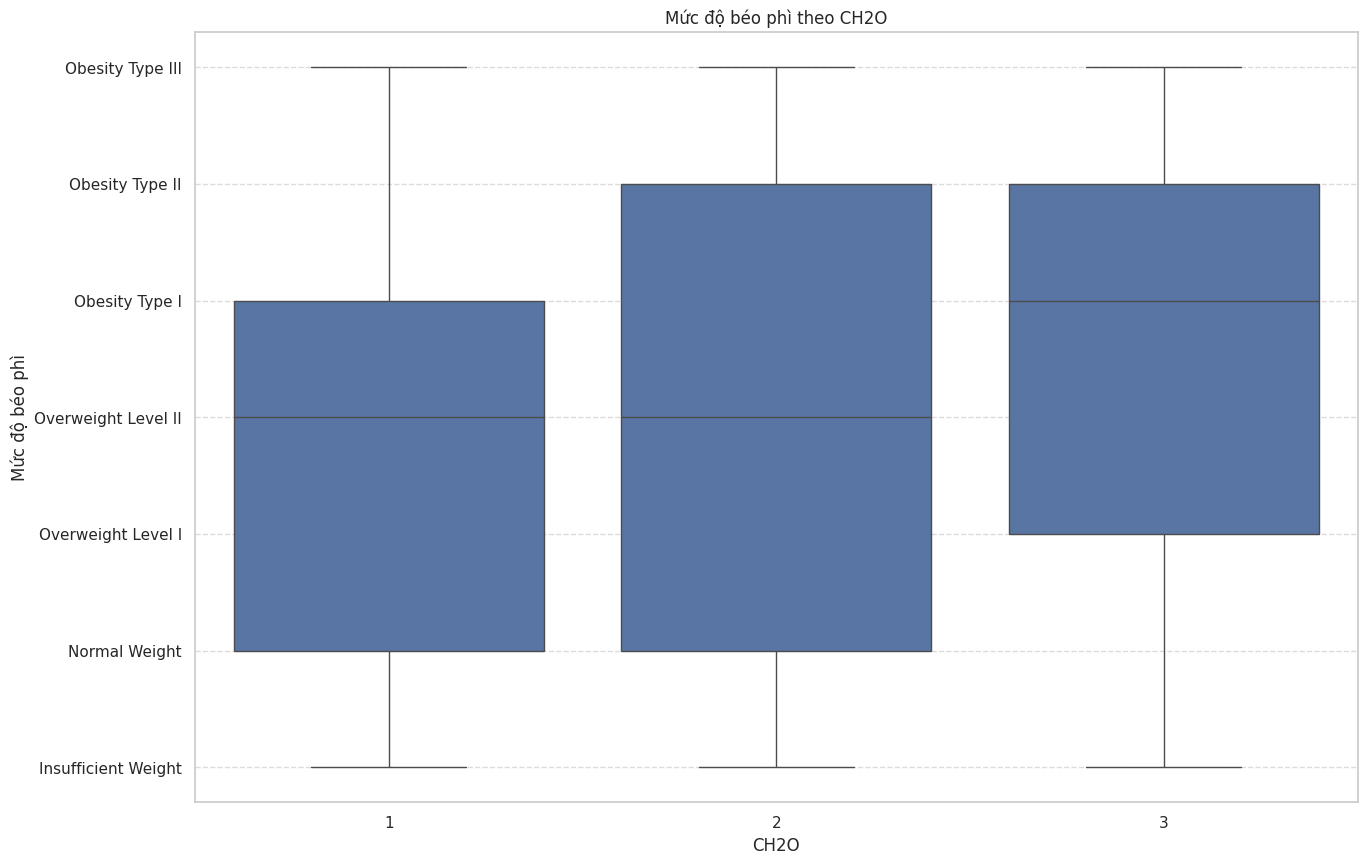

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = data
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
df['CH2O'] = df['CH2O'].round().astype(int)
plt.figure(figsize=(15, 10))
sns.boxplot(x='CH2O', y='NObeyesdad', data=df)
plt.title('Mức độ béo phì theo CH2O')
plt.xlabel('CH2O')
plt.ylabel('Mức độ béo phì')
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Insufficient Weight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Biểu đồ mức độ béo phì theo thuộc tính CH2O cho ta thấy được sự phân bố giữa các nhóm không có sự khác biệt đáng kể, cả ba nhóm đều tập trung chủ yếu từ
OverWeight loại 1 tới Obesity loại 2
- Ngoài ra, biểu đồ còn cho thấy rằng người có xu hướng uống nhiều nước hơn sẽ dễ có các mức độ béo phì nghiêm trọng hơn, điều này phản ánh sai với hiện thực rằng uống nước có ảnh hưởng tới việc trao đổi chất của cơ thể cũng như giảm cảm giác đói

### CALC - Tần suất tiêu thụ đồ uống có cồn

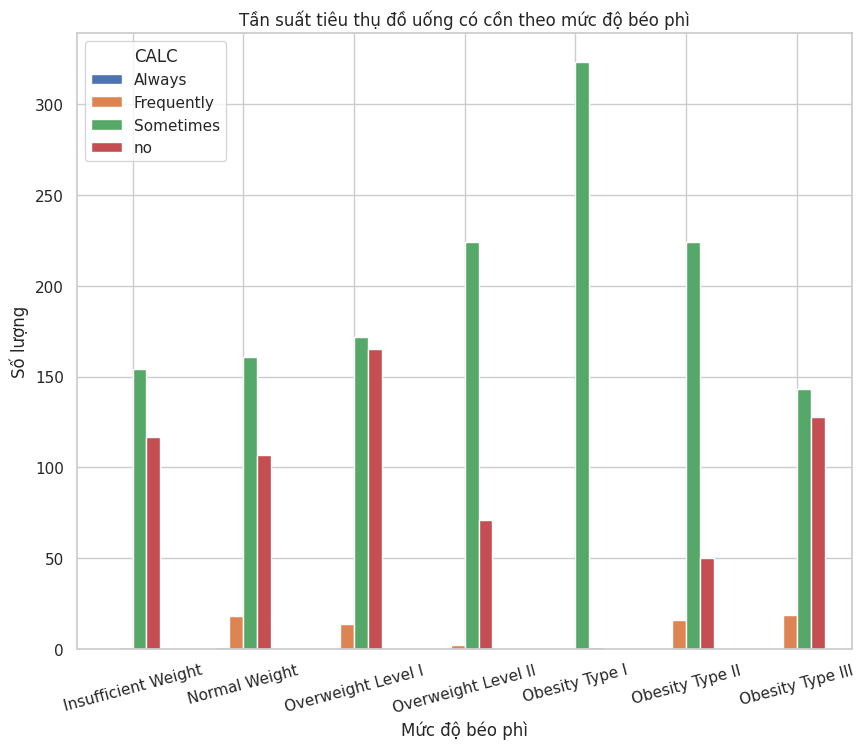

In [25]:
df_plot = data[['CALC', 'NObeyesdad']]

grouped_data = df_plot.groupby(['NObeyesdad', 'CALC']).size().unstack()
obesity_levels = [
    'Insufficient Weight',
    'Normal Weight',
    'Overweight Level I',
    'Overweight Level II',
    'Obesity Type I',
    'Obesity Type II',
    'Obesity Type III'
]
grouped_data.plot(kind='bar', stacked=False, figsize=(10 ,8))
plt.title('Tần suất tiêu thụ đồ uống có cồn theo mức độ béo phì')
plt.xlabel('Mức độ béo phì')
plt.ylabel('Số lượng')
plt.xticks(ticks=range(len(obesity_levels)), labels=obesity_levels, rotation=15)
plt.legend(title='CALC', loc='upper left', labels=['Always','Frequently', 'Sometimes', 'no'])
plt.show()

- Từ biểu đồ ta có thể thấy được giá trị Sometimes có xu hướng phổ biến hơn trong các cột mức độ béo phì nghiêm trọng hơn và giá trị no phổ biến với các cột mức độ béo phì nhẹ hơn
- Điều trên phản ảnh đúng thực tế rằng đồ uống có cồn có thể tác động đến quá trình hấp thụ cũng như chuyển hóa calo và dinh dưỡng.

## 4.3 Các thuộc tính liên quan đến tình trạng thể chất

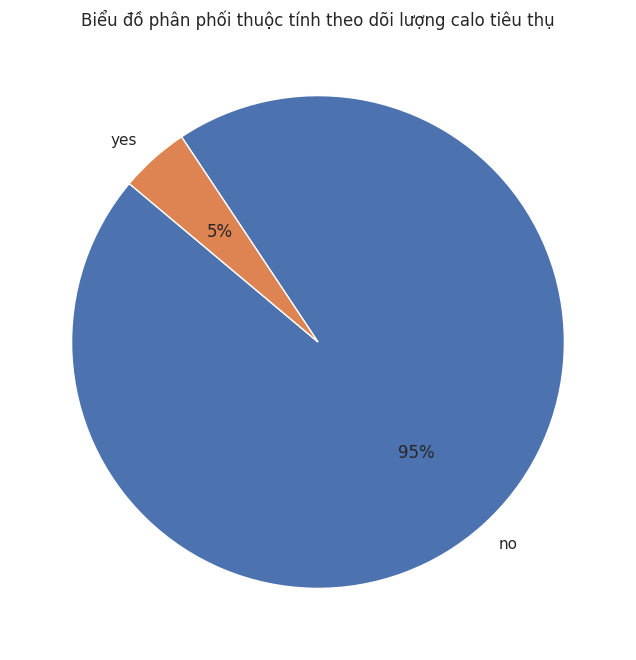

In [26]:
smoke_counts = data['SCC'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(smoke_counts, labels=smoke_counts.index, autopct='%1.f%%', startangle=140)
plt.title('Biểu đồ phân phối thuộc tính theo dõi lượng calo tiêu thụ')
plt.show()

- Nhóm theo dõi calo tiêu thụ thấp hơn rất nhiều so với nhóm không theo dõi, phản ánh chênh lệch trong nhận thức về sức khỏe và mục tiêu cá nhân.
Chỉ một phần nhỏ dân số thực sự quan tâm và đặc biệt theo dõi lượng calo tiêu thụ hàng ngày.
- Giúp người tiêu thụ nhận thức rõ ràng hơn về lượng calo tiêu thụ và tiêu hao, có thể dẫn đến thay đổi lối sống, chế độ ăn uống để đạt được mục tiêu cân nặng.
- Phần lớn nguy cơ béo phì có thể được quyết định bởi nhiều yếu tố khác thói quen ăn uống, hoạt động thể chất và môi trường sống.
- Là một công cụ hữu ích để quản lý cân nặng, nhưng không thể xem đây là nguyên nhân chính gây ra béo phì.

### FAF- Tần suất hoạt động thể chất

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Overweight_Level_I'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Obesity_Type_I'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

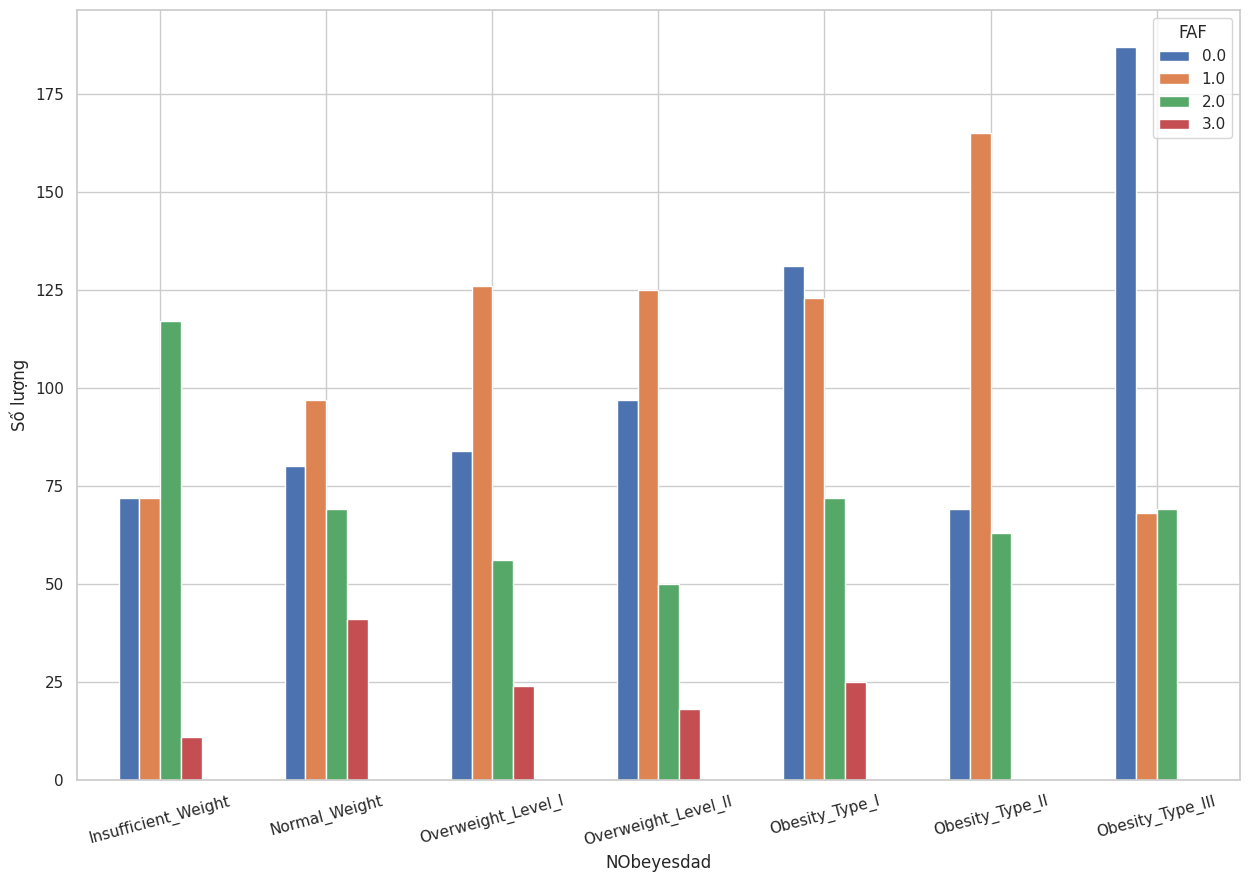

In [27]:
data = pd.read_csv('https://drive.usercontent.google.com/download?id=1KjTj1xm230mTHo3OSU_jU8rkHb9CT0-e&export=download&authuser=0&confirm=t&uuid=05a95e18-1964-46be-abae-24413b432217&at=APZUnTUSPfM1ndnrzXr6GHgZho0B:1714197726199')
data['FAF'] = data['FAF'].round()

custom_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

data['NObeyesdad'] = pd.Categorical(data['NObeyesdad'], categories=custom_order, ordered=True)

data_sorted = data.sort_values('NObeyesdad')

tue_counts = data_sorted.groupby(['NObeyesdad', 'FAF']).size().unstack(fill_value=0)

# Vẽ biểu đồ stacked bar
tue_counts.plot(kind='bar', stacked=False, figsize=(15,10))
plt.ylabel('Số lượng')
plt.xticks(rotation=15)

- Tổ chức WHO và các cơ quan y tế khác khuyến nghị mức độ hoạt động thể chất phù hợp để ngăn ngừa tăng cân và cải thiện thể lực
- Đối với những người muốn giảm cân, mức độ hoạt động thể chất cao hơn được khuyến nghị.
- Nghiên cứu đã chỉ ra rằng việc duy trì mức hoạt động thể chất cao giúp giảm thiểu việc tăng cân

### TUE - Thời gian sử dụng thiết bị công nghệ

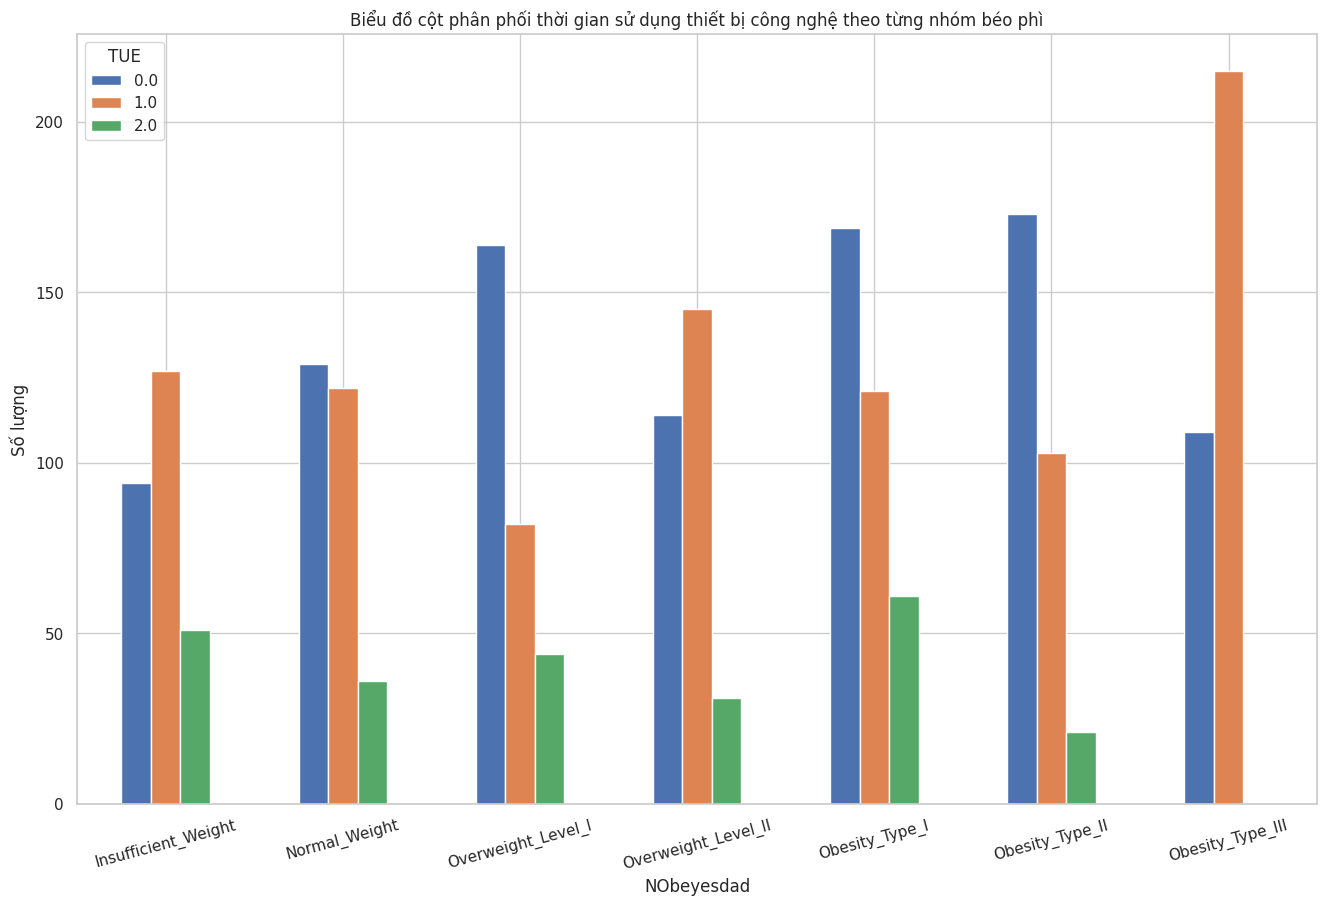

In [28]:
data['TUE'] = data['TUE'].round()
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

tue_counts = data.groupby(['NObeyesdad', 'TUE']).size().unstack(fill_value=0)
tue_counts = tue_counts.reindex(order)

tue_counts.plot(kind='bar', figsize=(16,10))
plt.ylabel('Số lượng')
plt.xticks(rotation=15)
plt.title('Biểu đồ cột phân phối thời gian sử dụng thiết bị công nghệ theo từng nhóm béo phì')

plt.show()


- Nhóm người béo phì có xu hướng sử dụng thiết bị công nghệ nhiều hơn so với nhóm người có cân nặng bình thường.
- Nghiên Cứu Harvard về Thanh Thiếu Niên và Béo Phì:
Thanh thiếu niên dành nhiều giờ mỗi ngày cho thiết bị công nghệ có nguy cơ cao hơn bị béo phì.
Thanh thiếu niên dành nhiều thời gian trước màn hình có khả năng ttiêu thụ thức ăn không lành mạnh hơn, dẫn đến nguy cơ béo phì tăng lên.
- Sử dụng nhiều thời gian cho thiết bị công nghệ có thể dẫn đến việc giảm thời gian hoạt động thể chất và tăng nguy cơ béo phì.
*Là yếu tố đóng góp vào nguy cơ béo phì, thông qua việc ảnh hưởng đến thói quen ăn uống và hoạt động thể chất*

### MTRANS - Phương tiện di chuyển

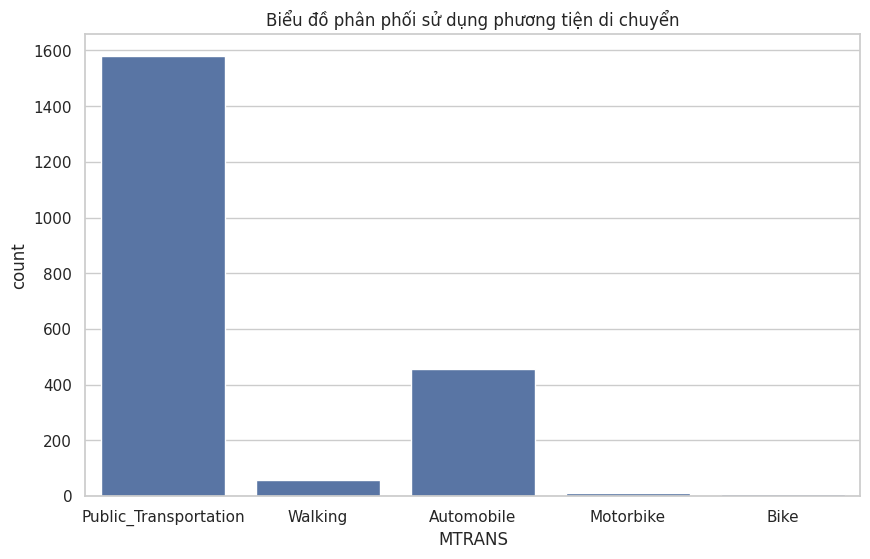

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='MTRANS', data=data)
plt.title('Biểu đồ phân phối sử dụng phương tiện di chuyển')
plt.show()

- Phương tiện công cộng được sử dụng nhiều nhất, sự phổ biến của phương tiện công cộng không phụ thuộc vào trạng thái cân nặng của cá nhân.
- Nghiên cứu của Ellen Flint  cho thấy sự thay đổi nhỏ về BMI(0.3kg/m2) giữa việc sử dụng phương tiện di chuyển tích cực và công cộng so với sử dụng ô tô trong vòng 4 năm.
*Yếu tố phương tiện di chuyển không ảnh hưởng lớn trong việc đánh giá các yếu tố ảnh hưởng đến béo phì*


### SMOKE - Hút thuốc

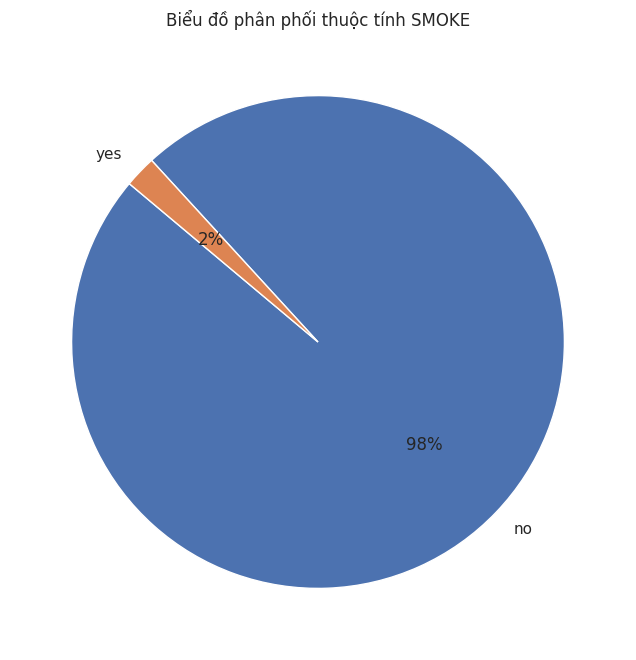

In [30]:
smoke_counts = data['SMOKE'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(smoke_counts, labels=smoke_counts.index, autopct='%1.f%%', startangle=140)
plt.title('Biểu đồ phân phối thuộc tính SMOKE')
plt.show()

- Sự chênh lệch lớn giữa hai nhóm
- Người hút thuốc trưởng thành có xu hướng có trọng lượng cơ thể thấp hơn những người không hút thuốc, nhưng một phần đáng kể vẫn bị béo phì.
- Nicotin trong thuốc lá có thể giảm lượng calo tiêu thụ và làm thay đổi cách ăn uống.
*Dữ liệu chênh lệch, chưa đủ thông tin cụ thể, chưa thể đưa ra mối liên hệ giữa thuộc tính này với béo phì.*

# 5. Kết luận
Từ phân tích ở trên, ngoài chiều cao và cân nặng thì các yếu tố ảnh hưởng lớn đến béo phì có thể kể đến là: tần suất tiêu thụ thức ăn nhiều calo, tần suất tiêu thụ thực ăn giữa các bữa ăn, tần suất vận động thể chất, thời gian sử dụng các thiết bị công nghệ. Một người muốn cải thiện tình trạng béo phì hãy thay đổi các thói quen trên một cách phù hợp.


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
metrics_gradient = classification_report(y_test, y_pred)
print(metrics_gradient)
data = pd.read_csv('https://drive.usercontent.google.com/download?id=1KjTj1xm230mTHo3OSU_jU8rkHb9CT0-e&export=download&authuser=0&confirm=t&uuid=05a95e18-1964-46be-abae-24413b432217&at=APZUnTUSPfM1ndnrzXr6GHgZho0B:1714197726199')
# Chuyển đổi các thuộc tính dạng chuỗi thành dạng số
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

X = data.drop(columns=['NObeyesdad', 'FCVC', 'MTRANS', 'CALC', 'SCC', 'NCP', 'SMOKE', 'CH2O'])
y = data['NObeyesdad']

selected_feature = X.columns

print("Các thuộc tính quan trọng được chọn lại:", selected_feature)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Các thuộc tính quan trọng được chọn lại: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'CAEC', 'FAF', 'TUE'],
      dtype='object')


In [67]:
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=40)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Gradient Boosting sau khi chọn lại các thuộc tính:", accuracy)
metrics = classification_report(y_test, y_pred)
print(metrics)

Độ chính xác của mô hình Gradient Boosting sau khi chọn lại các thuộc tính: 0.9692671394799054
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.98      0.89      0.93        62
           2       1.00      0.95      0.97        78
           3       0.97      1.00      0.98        58
           4       1.00      1.00      1.00        63
           5       0.90      0.98      0.94        56
           6       1.00      0.98      0.99        50

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



In [35]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier()
rd.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred_rd = rd.predict(X_test)
accuracy_rd = accuracy_score(y_test, y_pred_rd)
print("Độ chính xác của mô hình RandomForest sau khi chọn lại các thuộc tính:", accuracy_rd)
metrics_rd = classification_report(y_test, y_pred_rd)
print(metrics_rd)

Độ chính xác của mô hình RandomForest sau khi chọn lại các thuộc tính: 0.9574468085106383
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.92      0.87      0.89        62
           2       0.99      0.96      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.93      0.90        56
           6       0.98      1.00      0.99        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Huấn luyện mô hình trên tập huấn luyện
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Độ chính xác của mô hình KNN sau khi chọn lại các thuộc tính:", accuracy_knn)
metrics_knn = classification_report(y_test, y_pred_knn)
print(metrics_knn)

Độ chính xác của mô hình KNN sau khi chọn lại các thuộc tính: 0.8912529550827423
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        56
           1       0.86      0.61      0.72        62
           2       0.89      0.92      0.91        78
           3       0.97      0.98      0.97        58
           4       0.98      1.00      0.99        63
           5       0.80      0.93      0.86        56
           6       0.86      0.84      0.85        50

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423



In [64]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C = 5)

# Huấn luyện mô hình trên tập huấn luyện
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Độ chính xác của mô hình KNN sau khi chọn lại các thuộc tính:", accuracy_svm)
metrics_svm = classification_report(y_test, y_pred_svm)
print(metrics_svm)

Độ chính xác của mô hình KNN sau khi chọn lại các thuộc tính: 0.933806146572104
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        56
           1       0.92      0.79      0.85        62
           2       0.99      0.95      0.97        78
           3       0.95      1.00      0.97        58
           4       1.00      1.00      1.00        63
           5       0.86      0.88      0.87        56
           6       0.89      0.96      0.92        50

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



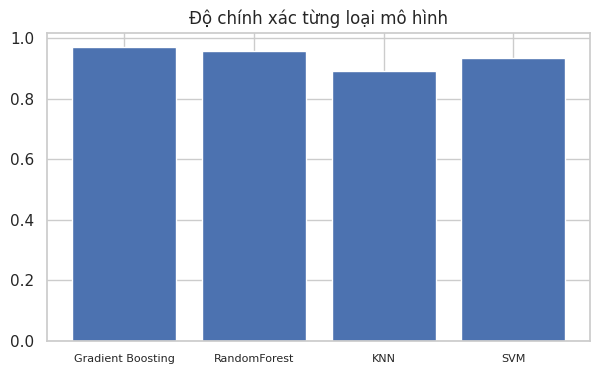

In [76]:
import matplotlib.pyplot as plt
y = [accuracy, accuracy_rd, accuracy_knn, accuracy_svm]
models = ['Gradient Boosting', 'RandomForest', "KNN", "SVM"]

# Vẽ biểu đồ cột
plt.figure(figsize=(7, 4))
plt.bar(models, y)
plt.title("Độ chính xác từng loại mô hình")
plt.xticks(fontsize = 8)
plt.show()

Ta thấy được mô hình Gradient Boosting có độ chính xác cao nhất trong 4 mô hình được lựa chọn.

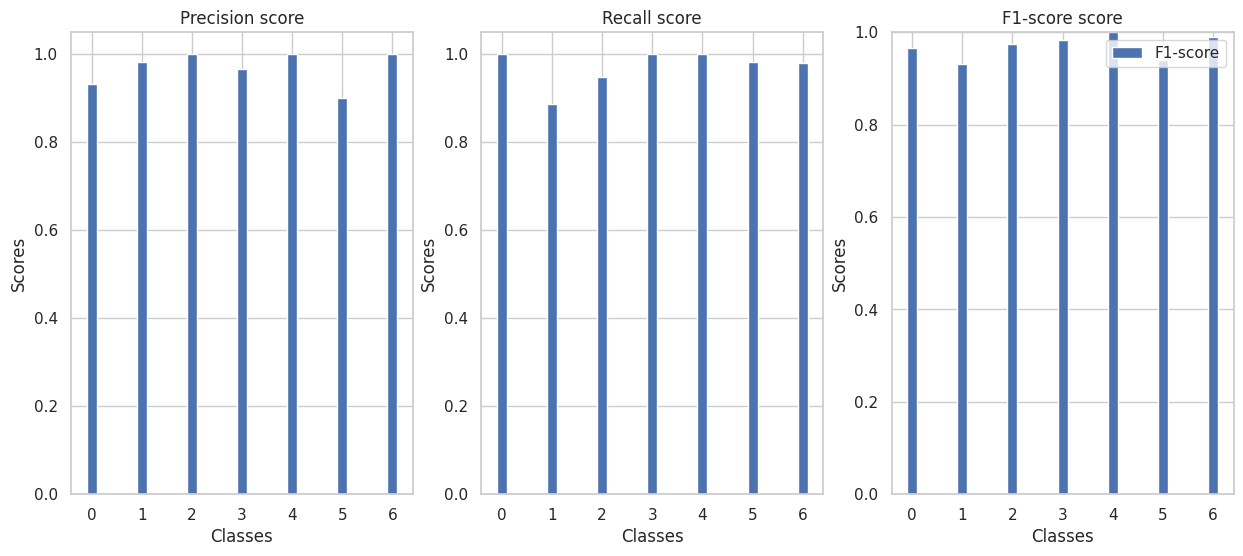

In [84]:
metrics = classification_report(y_test, y_pred, output_dict=True)
precision = [metrics[str(i)]['precision'] for i in range(len(metrics) - 3)]
recall = [metrics[str(i)]['recall'] for i in range(len(metrics) - 3)]
f1_score = [metrics[str(i)]['f1-score'] for i in range(len(metrics) - 3)]
labels = list(range(len(metrics) - 3))

# Vẽ biểu đồ
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.bar(labels, precision, width=0.2, label='Precision')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision score')

plt.subplot(1, 3, 2)
plt.bar(labels, recall, width=0.2, label='Recall')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Recall score')

plt.subplot(1, 3, 3)
plt.bar(labels, f1_score, width=0.2, label='F1-score')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('F1-score score')
plt.legend()
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1
plt.show()

Mô hình được đánh giá là tốt ở các lớp dự đoán thông qua nhiều cách tính toán đánh giá khác nhau

- Ngoài các thuộc tính ở trên thì nghiên cứu đề suất việc thu thập thêm thông tin về giấc ngủ và tình trạng tâm lý để có cái nhìn khái quát hơn nữa về béo phì.
- Nhóm hy vọng kết quả nghiên cứu này có thể cung cấp thông tin hữu ích cho các chương trình can thiệp và chính sách công cộng nhằm giảm nguy cơ béo phì và cải thiện sức khỏe cộng đồng.
